# Possible Effect of COVID-19 on Housing Markets

Disclaimer: This post is speculative. Most of the epidemiological metrics currently available for COVID-19 are estimates and the projections below, based on these metrics, could therefore be incorrect. The models are also very simple.

Unlike previous posts, this one will have the information first and the technical details about it below, along with sources and code. Essentially we use the class `CountryData` to hold the demographic information of a country (scraped from the web) along with home ownership data for that country as well as a dictionary giving the death rate for the coronavirus by age cohort, and finally an infection rate. From this we can do some multiplication (rather, Python can) and work out the homeowner death rate by age cohort. From that we can then estimate how many house will be left without an ower by crudely multiplying it by the current ratio of houses to homeowners.

First we create an instance of `CountryData` with the country code to get the correct url (the year is set to the default 2019, but can be changed).

In [20]:
USA=CountryData(country_keys['united-states-of-america'])

It now needs to know the number of homeowners in the US, as well as the demographic information.

In [21]:
USA.total_homes=138537078

We can de a quick check to see if that worked:

In [22]:
USA.show_population()

,population_size
"(0, 4)",19604096.0
"(5, 9)",20287749.0
"(10, 14)",21147469.0
"(15, 19)",21250602.0
"(20, 24)",22435967.0
"(25, 29)",23743098.0
"(30, 34)",22703421.0
"(35, 39)",21276648.0
"(40, 44)",20151573.0
"(45, 49)",20136867.0


Using the dictionary `homeownership_rates` below (see Sources section for details), we can get the housing data:

In [23]:
USA.get_home_ownership_dictionary(homeownership_rates)

Here we can see what share different age groups have of the housing market. This shows how many homeowners belong to each group (the large number of owners younger than 25 is surprising).

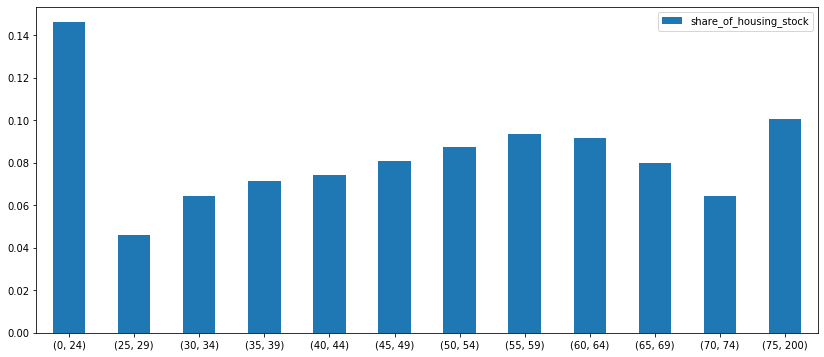

In [24]:
USA.show_homeownership_share().plot(kind='bar', figsize=(14,6), rot=0)

Next we include the death rates, from [worldmeters.info](https://www.worldometers.info/coronavirus/coronavirus-age-sex-demographics/) (see Sources for more details).

In [25]:
USA.get_homeowner_death_rates(coronavirus_death_dict_raw)

Finally, we can chart the expected number of houses left vacant for a range of infection rates (i.e. proportion of the population that get infected). We need the number of houses because the number of homeowners is not the same (it is about $50\%$ larger). This is likely due to most houses having more than one owner. To correct for this, we multiply the number of expected dead homeowners by the ratio of houses to homeowners, giving a rough estimate of how many houses will be ownerless.

In [26]:
infection_rates=np.arange(0.00, 1.05, 0.05)
vacant_homes_list=[USA.get_vacant_homes(rate)/(10**6) for rate in infection_rates]

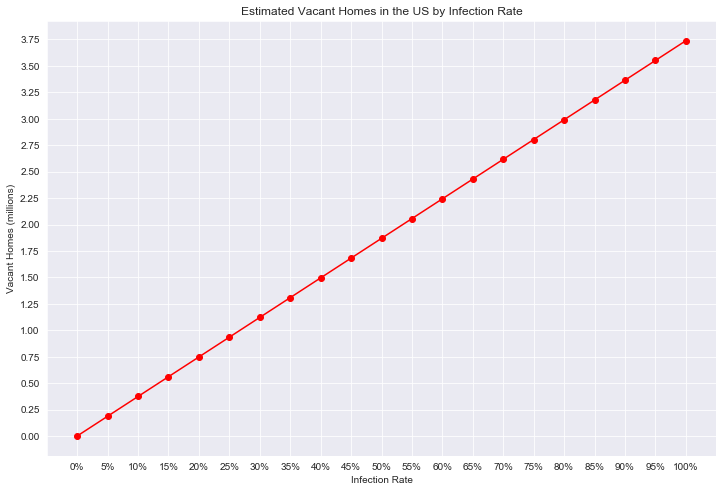

In [27]:
x=list(map(lambda x : str(int(x*100))+'%',infection_rates))
y=vacant_homes_list
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(x, y, marker='o', color='r')
plt.xlabel('Infection Rate')
plt.yticks(np.arange(y[0], y[-1]+0.25, 0.25))
plt.ylabel('Vacant Homes (millions)')
plt.title('Estimated Vacant Homes in the US by Infection Rate')
plt.show()

In recent years the number of houses sold per year in the US has been between 5 and 5.5 million. This shows that even at a very low infection rate the number of houses on the market could increase significantly. Some have estimated that the infection rate could be as high as $70\%$, which would imply about an extra 2.5 million homes on the market. Even a lower figure of $40\%$ would give an extra 1.5 million houses.

For comparison, we can look at the number of deaths by different infection rates (this is also a simple linear model).

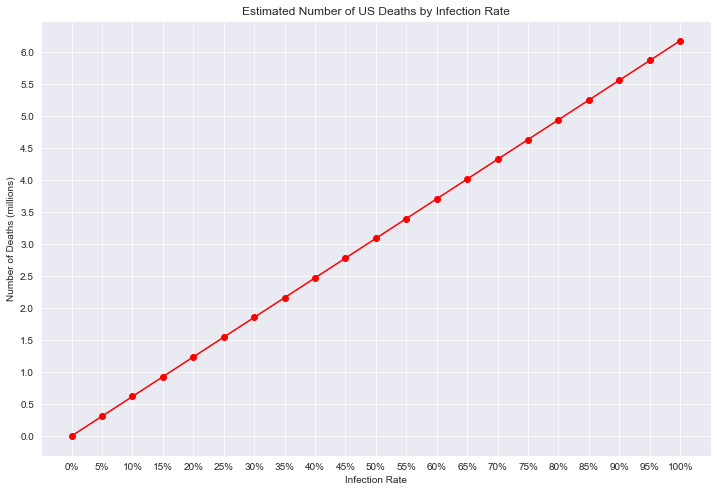

In [28]:
y=[int(USA.get_population_deaths(rate).sum())/(10**6) for rate in infection_rates]
plt.figure(figsize=(12,8))
plt.plot(x, y, marker='o', color='r')
plt.xlabel('Infection Rate')
plt.yticks(np.arange(y[0], y[-1]+0.05, 0.5))
plt.ylabel('Number of Deaths (millions)')
plt.title('Estimated Number of US Deaths by Infection Rate')
plt.show()

Below is a bar chart showing the number of deaths by age cohort. Since the number of deaths is directly proportional to the infection rate, the bar chart will look the same for all (non-zero) infection rates, but with larger numbers on the $y$ axis for larger infection rates. A rate of $40\%$ is used.

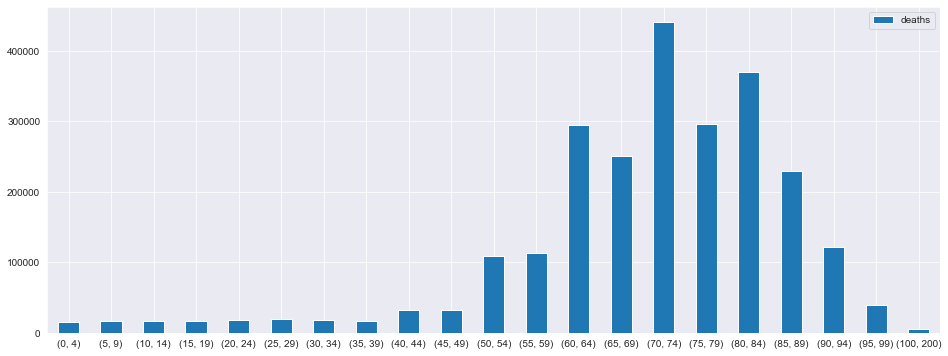

In [29]:
USA.get_population_deaths(0.4).plot(kind='bar', figsize=(16,6), rot=0)

For comparison, we can do the same analysis for Ireland. Ireland was chosen for two reasons, neither of which are very good, but good enough:
1. The housing data is easy to access.
2. I am Irish.

In [30]:
Ireland=CountryData(country_keys['ireland'])

The dictionary used below is from [Irish National Economic and Social Council](http://files.nesc.ie/nesc_reports/en/140_Homeownership_and_Rental.pdf).

In [31]:
Ireland.get_home_ownership_dictionary(ireland_dict)

Ireland.show_homeownership_share()

,share_of_housing_stock
"(0, 24)",0.058983
"(25, 34)",0.100915
"(35, 44)",0.215335
"(45, 54)",0.208200
"(55, 64)",0.175955
"(65, 200)",0.240612


In [32]:
Ireland.get_homeowner_death_rates(coronavirus_death_dict_raw)
Ireland.total_homes=1689300

vacant_homes_list_Ireland=[Ireland.get_vacant_homes(rate) for rate in infection_rates]

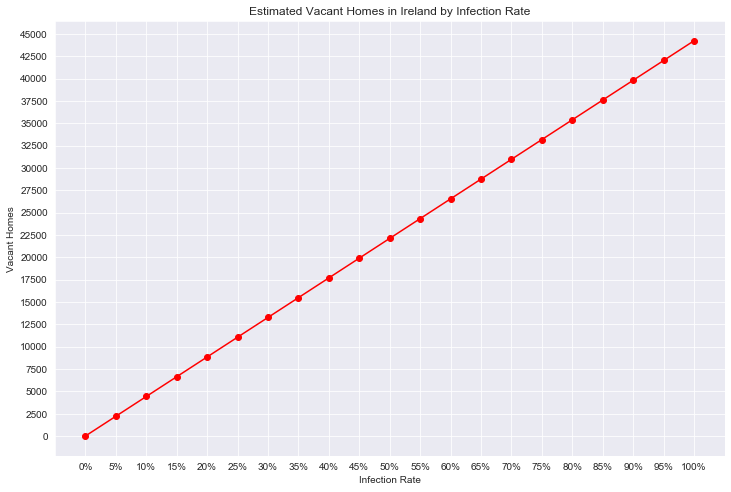

In [33]:
y=vacant_homes_list_Ireland
plt.figure(figsize=(12,8))
plt.plot(x, y, marker='o', color='r')
plt.xlabel('Infection Rate')
plt.yticks(np.arange(y[0], y[-1]+2500, 2500))
plt.ylabel('Vacant Homes')
plt.title('Estimated Vacant Homes in Ireland by Infection Rate')
plt.show()

There were 61,733 houses sold in Ireland in 2019 (see the[ Irish CSO's webpage](https://statbank.cso.ie/px/pxeirestat/Database/eirestat/House%20Prices/House%20Prices_statbank.asp?SP=House%20Prices&Planguage=0) - it has remained in the 60,00-65,000 range for the past 3 years). As with the US, an infection rate of $70\%$ would give an additional number of houses for sale equal to about half a typical recent year's housing sales.

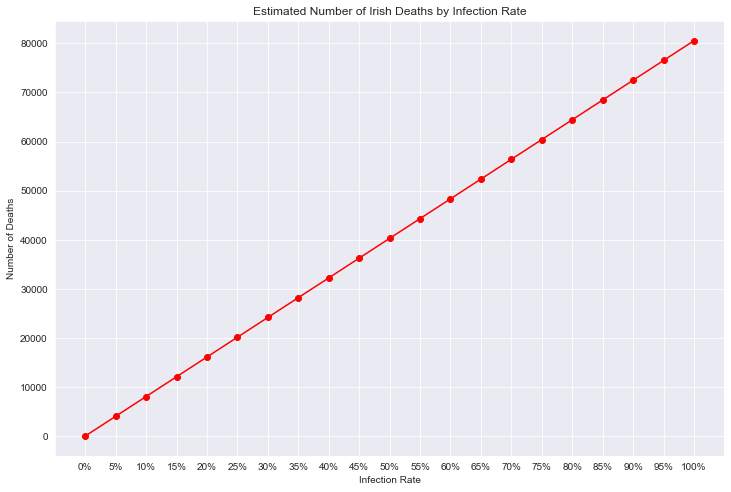

In [34]:
y=[int(Ireland.get_population_deaths(rate).sum()) for rate in infection_rates]
plt.figure(figsize=(12,8))
plt.plot(x, y, marker='o', color='r')
plt.xlabel('Infection Rate')
plt.yticks(np.arange(y[0], y[-1], 10000))
plt.ylabel('Number of Deaths')
plt.title('Estimated Number of Irish Deaths by Infection Rate')
plt.show()

Since the Irish population's average age is slightly lower than that of the US, the Irish death numbers are lower per capita. However, and for this reason, the distribution of Irish deaths by age cohort skews towards the younger end compared to the US.

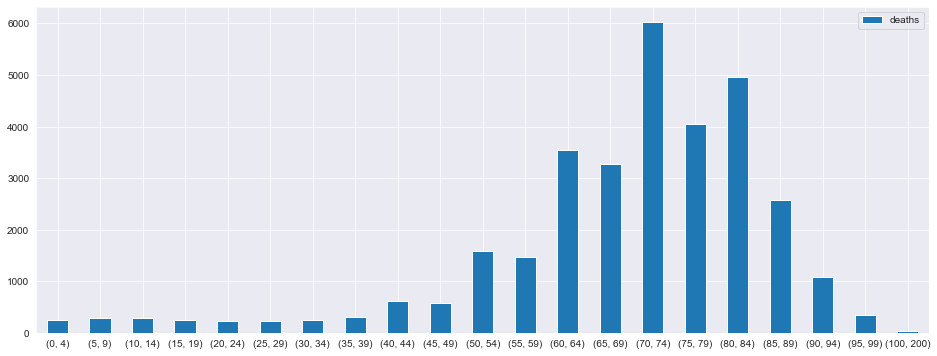

In [35]:
Ireland.get_population_deaths(0.4).plot(kind='bar', figsize=(16,6), rot=0)

# Sources and Code

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json

We are going to use the Python package OpenPyXL, with which one can read (and import via Pandas) Excel documents with Python. This project is not an ideal use case as the Excel file used below is small, but was nice to try out. The file is from the US Census Bureau, under the homeownership data section. Here, they give the homeownership rates for certain age cohorts. We want to find out how many people from different age cohorts own homes, whcih can be done once we have the demographic data.

In [2]:
from openpyxl import load_workbook

In [3]:
wb=load_workbook('tab7.xlsx')

After some exploration in Excel, the relevant part of the file is found:

In [4]:
raw_home_df=pd.DataFrame(wb['Table 7'].values)[[0,2]][11:23]

And here it is:

In [5]:
raw_home_df.head()

,0,2
11,….Under 25 years.................................,24
12,….25 to 29 years.................................,33.4
13,….30 to 34 years.................................,48.9
14,….35 to 39 years.................................,57.8
15,….40 to 44 years.................................,63.2


This needs some cleaning.

In [6]:
def clean_df_year_range(s):
    s=s.split('.')[1]
    s=s.replace('years and over', 'to 200')
    s=s.strip(' years')
    s=s.replace('Under 25','0 to 24')
    pair=s.split(' to ')
    pair=tuple(map(int, pair))
    return pair

In [7]:
raw_home_df[0]=raw_home_df[0].apply(clean_df_year_range)

In [8]:
raw_home_df.columns=[['age','home_ownership_rate']]

In [9]:
raw_home_df

,age,home_ownership_rate
11,"(0, 24)",24
12,"(25, 29)",33.4
13,"(30, 34)",48.9
14,"(35, 39)",57.8
15,"(40, 44)",63.2
16,"(45, 49)",69
17,"(50, 54)",72.1
18,"(55, 59)",74.3
19,"(60, 64)",77
20,"(65, 69)",78.8


This is better, this is only needed as a dictionary.

In [10]:
homeownership_rates={}
for i in range(len(raw_home_df)):
    homeownership_rates[raw_home_df[['age']].values[i][0]]=raw_home_df[['home_ownership_rate']].values[i][0]/100

In [11]:
homeownership_rates

{(0, 24): 0.24,
 (25, 29): 0.33399999999999996,
 (30, 34): 0.489,
 (35, 39): 0.578,
 (40, 44): 0.632,
 (45, 49): 0.69,
 (50, 54): 0.721,
 (55, 59): 0.743,
 (60, 64): 0.77,
 (65, 69): 0.7879999999999999,
 (70, 74): 0.805,
 (75, 200): 0.782}

## Getting the country code dictionary

Now, the main tool we will use to hold the demographic information and all the statistics for each country will be class (skip below to the next section for the class's definition). First, we need to use the requests package to get demographic information (population sizes for each 5 year age cohort) from [populationpyramid.net](https://www.populationpyramid.net). We will also scrape a dictionary so we can just look this up for each country's URL code.

In [12]:
url='https://www.populationpyramid.net/world/2019/'
text_data=requests.get(url).text

Playing around with the page, it looks like each country's URL code is index with the country's name and the string `'country='` before it. So we will split with this string and then try to split each one using quotes, which are usually put around each country's name.

In [13]:
raw_list=text_data.split('country=')[1:]

In [14]:
raw_list[0].split('"')#then take 1 and 3

['',
 '4',
 ' slug=',
 'afghanistan',
 ' href=',
 '/afghanistan/2019/',
 '>Afghanistan</a>\n<a class=',
 'countryLink',
 ' ']

With this we can make the dictionary:

In [15]:
country_keys=dict(map(lambda x:(x.split('"')[3], x.split('"')[1]), raw_list))

In [16]:
country_keys

{'afghanistan': '4',
 'africa': '903',
 'albania': '8',
 'algeria': '12',
 'angola': '24',
 'antigua-and-barbuda': '28',
 'argentina': '32',
 'armenia': '51',
 'aruba': '533',
 'asia': '935',
 'australia': '36',
 'australianew-zealand': '927',
 'austria': '40',
 'azerbaijan': '31',
 'bahamas': '44',
 'bahrain': '48',
 'bangladesh': '50',
 'barbados': '52',
 'belarus': '112',
 'belgium': '56',
 'belize': '84',
 'benin': '204',
 'bhutan': '64',
 'bolivia-plurinational-state-of': '68',
 'bosnia-and-herzegovina': '70',
 'botswana': '72',
 'brazil': '76',
 'brunei-darussalam': '96',
 'bulgaria': '100',
 'burkina-faso': '854',
 'burundi': '108',
 'cabo-verde': '132',
 'cambodia': '116',
 'cameroon': '120',
 'canada': '124',
 'caribbean': '915',
 'central-african-republic': '140',
 'central-america': '916',
 'central-asia': '5500',
 'chad': '148',
 'channel-islands': '830',
 'chile': '152',
 'china': '156',
 'china-hong-kong-sar': '344',
 'china-macao-sar': '446',
 'colombia': '170',
 'comoro

Here are the coronavirus death rates, courtesy of [worldmeters.info](https://www.worldometers.info/coronavirus/coronavirus-age-sex-demographics/).

In [17]:
coronavirus_death_dict_raw={(80,200):0.148,
                            (70,79):0.08,
                            (60,69):0.036,
                            (50,59): 0.013,
                            (40,49):0.004,
                            (30,39):0.002,
                            (20,29): 0.002,
                            (0,19):0.002}

The information below is courtesy of the [Irish National Economic and Social Council](http://files.nesc.ie/nesc_reports/en/140_Homeownership_and_Rental.pdf).

In [18]:
ireland_dict={(0,24):0.091,
             (25,34): 0.423,
             (35,44):0.689,
             (45,54):0.786,
             (55,64):0.832,
             (65,200):0.866}

## Country Code Class

Here we define the class `CountryData()` that will hold demographic information and do the necessary calculations. The main thing preventing us from doing this for all countries is a lack of homeownership data (which can probably be found somewhere online, but depending on the country). This class could be used a number of ways. The total number of homes for the US can be found on the US Census website or from the [UNECE](https://w3.unece.org/PXWeb2015/pxweb/en/STAT/STAT__30-GE__02-Families_households) (which also has information for many other countries).

Now, the demographic data from populationpyramid.net has small cohorts, but often the homeownership information and the death rate information comes with larger cohort sizes. For this reason we must to store this information differently in the class in order to keep track of all the different dictionaries. Essentially, the class below cleans up a lot of the data analysis.

### Function definitions:

Below, 'age cohort' means an age group, e.g. everyone between the ages of 20 and 25 (including 20, but not 25).

* `show population`: returns a dataframe containing each age cohort's population size.

* `show_homeownership_rates`:  returns a dataframe containing the information in the `homeownership_rates_dict`, giving the rate of homeonwership for age cohorts (note: the cohort partitioning may be different from that above).

* `show_homeownership_share`:  returns a dataframe containing each age cohort's share of total homeowners.

* `show_death_rates_by_age_cohort`:  returns a dataframe containing each age cohort's death rate, per the death rate dictionary.

* `get_vacant_homes`: takes an infection rate (total proportion of population infected) and returns the number of vacant homes given this rate (needs a death rate dictionary first). Note that this also requires `self.total_homes` to be filled in with external data in order to estimate the correction factor of homes to homeowners.

* `get_population_deaths`: takes an infection rate and optionally a death rate dictionary (only put this in if it doesnot already have one) and returns the expected number of people in each age cohort that would die at that infection rate and age cohort death rate.

* `get_home_ownership_dictionary`: takes a dictionary of homeownership rates for different age cohorts in a population and works out the proportion of total homeowners in each age cohort, which is then stored as `self.house_ownership_share_dict`. Note that the age cohorts may be wider for the housing dictionary (the code takes care of this).

* `house_ownership_share_dict`: this is the main use of the `CountryData` class. Given a death rate dictionary (and once the `get_home_ownership_dictionary` method has been run to get homeownership shares across age cohorts) this calculates the homeowner death rate for each age cohort and stores it so the `get_vacant_homes` method can be called.

In [19]:
class CountryData(object):
    def __init__(self, country_code, year=2019):
        self.pop_dict=None
        self.house_ownership_rates_dict=None
        self.house_ownership_share_dict=None
        self.total_homeowners=0
        self.total_population=0
        self.death_dict=None
        self.total_homeowners_dead_max=0
        self.homeowner_cohort_death_rates_dict=None
        self.infection_rate=1
        self.total_homes=0
        self.total_homes_vacant=0
        self.population_death_dict=None
        
        url='https://www.populationpyramid.net/api/pp/'+country_code+'/'+str(year)+'/'
        raw_pop_data=requests.get(url)
        raw_pop_data=json.loads(raw_pop_data.text)
        sexes={'male','female'}
        pop_dict={}
        for sex in sexes:
            for entry in raw_pop_data[sex]:
                if '-' in entry['k']:
                    pair=tuple(map(int, entry['k'].split('-')))
                else:
                    pair=(100,200)
                if pair not in pop_dict:
                    pop_dict[pair]=entry['v']*1000
                else:
                    pop_dict[pair]+=entry['v']*1000
        self.pop_dict=pop_dict
        self.total_population=sum(pop_dict.values())
        del pop_dict, raw_pop_data, url, sexes
        
    def show_population(self):
        return pd.DataFrame.from_dict(self.pop_dict, orient='index', columns=['population_size'])
    def show_homeownership_rates(self):
        return pd.DataFrame.from_dict(self.house_ownership_rates_dict, orient='index', columns=['proportion_of_which_own_a_house'])
    def show_homeownership_share(self):
        return pd.DataFrame.from_dict(self.house_ownership_share_dict, orient='index', columns=['share_of_housing_stock'])
    def show_death_rates_by_age_cohort(self):
        return pd.DataFrame.from_dict(self.death_dict, orient='index', columns=['death_rate'])
    
    def get_vacant_homes(self, infection_rate):
        if self.total_homeowners==0:
            print('Calculate number of homeowners first')
        homes_to_owners_ratio=self.total_homes/self.total_homeowners
        self.total_homes_vacant=self.total_homeowners_dead_max*homes_to_owners_ratio*infection_rate
        self.infection_rate=infection_rate
        return self.total_homes_vacant
    
    def get_population_deaths(self,infection_rate, death_rate_dict=None):
        if not death_rate_dict:
            death_rate_dict=self.death_dict
        else:
            self.death_dict=death_rate_dict
        death_dict_expanded={key:0 for key in self.pop_dict}
        self.population_death_dict={}
        for small_key in death_dict_expanded:
            for big_key in self.death_dict:
                if small_key[0]>=big_key[0] and small_key[1]<=big_key[1]:
                    death_dict_expanded[small_key]=self.death_dict[big_key]
                    self.population_death_dict[small_key]=death_dict_expanded[small_key]*self.pop_dict[small_key]
        death_dict_with_infection={key: self.population_death_dict[key]*infection_rate for key in self.population_death_dict}
        del death_dict_expanded
        return pd.DataFrame.from_dict(death_dict_with_infection, orient='index', columns=['deaths'])
        
    def get_home_ownership_dictionary(self, dictionary):
        self.house_ownership_rates_dict=dictionary
        if self.pop_dict!=None and self.house_ownership_rates_dict!=None:
            home_dict={key:0 for key in self.house_ownership_rates_dict}
            for key in self.pop_dict:
                for h_key in home_dict:
                    if key[0]>=h_key[0] and key[1]<=h_key[1]:
                        home_dict[h_key]+=self.pop_dict[key]*self.house_ownership_rates_dict[h_key]
            total_homes=sum(home_dict.values())
            self.total_homeowners=total_homes
            for key in home_dict:
                home_dict[key]/=total_homes
            self.house_ownership_share_dict=home_dict
            del home_dict
        else:
            print('Need both a population dictionary and home ownership rate dictionary.')
            
            
    def get_homeowner_death_rates(self,death_rate_dict):
        self.death_dict=death_rate_dict
        if self.pop_dict==None or self.house_ownership_share_dict==None or self.death_dict==None:
            if self.pop_dict==None:
                print('Need population dictionary')
            if self.house_ownership_share_dict==None:
                print('Need to calculate home ownership share dictionary')
            if self.death_dict==None:
                print('Need death rate dictionary')
        else:
            death_dict_expanded={key:0 for key in self.pop_dict}
            self.population_death_dict={}
            for small_key in death_dict_expanded:
                for big_key in self.death_dict:
                    if small_key[0]>=big_key[0] and small_key[1]<=big_key[1]:
                        death_dict_expanded[small_key]=self.death_dict[big_key]
                        self.population_death_dict[small_key]=death_dict_expanded[small_key]*self.pop_dict[small_key]

            home_death_dict={key:0 for key in self.house_ownership_share_dict}
            for big_key in home_death_dict:
                little_key=(big_key[0],big_key[0]+4)
                weighted_death_rate=0
                normalizer=0
                while little_key[1]<=big_key[1]:
                    weighted_death_rate+=self.pop_dict[little_key]*death_dict_expanded[little_key]
                    normalizer+=self.pop_dict[little_key]
                    little_key=(little_key[0]+5, little_key[1]+5)
                    if little_key[1]==104:
                        little_key=(100,200)
                normalizer=max(normalizer,1)
                weighted_death_rate/=normalizer
                home_death_dict[big_key]=self.house_ownership_share_dict[big_key]*weighted_death_rate
            self.homeowner_cohort_death_rates_dict=home_death_dict
            self.total_homeowners_dead_max=sum(self.homeowner_cohort_death_rates_dict.values())*self.total_homeowners
            del home_death_dict, normalizer, weighted_death_rate, death_dict_expanded